In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE
import joblib


In [8]:

# Load the dataset and preprocess as before
dataset_df = pd.read_csv("../Outputs/Dataset/Employee_attrition.csv")
label_encoders = {}
for column in dataset_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_df[column] = le.fit_transform(dataset_df[column])
    label_encoders[column] = le


In [9]:
# Separate features and target
X = dataset_df.drop('Attrition', axis=1)
y = dataset_df['Attrition']


In [10]:
# Balance the Dataset
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("Before Smoote" , y.value_counts())
print()
print("After Smoote" , y_smote.value_counts())

Before Smoote Attrition
0    1233
1     237
Name: count, dtype: int64

After Smoote Attrition
1    1233
0    1233
Name: count, dtype: int64


In [11]:
# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)


In [12]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Verify the distribution of classes
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("Test set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Attrition
1    0.5
0    0.5
Name: proportion, dtype: float64
Test set class distribution:
Attrition
1    0.5
0    0.5
Name: proportion, dtype: float64


In [14]:


# Define the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/100


/opt/anaconda3/envs/PythonData/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5381 - loss: 0.9731 - val_accuracy: 0.7468 - val_loss: 0.5879
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6953 - loss: 0.6577 - val_accuracy: 0.7747 - val_loss: 0.5097
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.7565 - loss: 0.5153 - val_accuracy: 0.7949 - val_loss: 0.4573
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.7577 - loss: 0.5149 - val_accuracy: 0.8025 - val_loss: 0.4272
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.7463 - loss: 0.5238 - val_accuracy: 0.7975 - val_loss: 0.4217
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.7971 - loss: 0.4273 - val_accuracy: 0.8127 - val_loss: 0.4106
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.8194 - loss: 0.4194 - val_accuracy: 0.8177 - val_loss: 0.4008
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.8182 - loss: 0.4045 - val_accuracy: 0.8127 - v

In [15]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.86


In [16]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Display some predictions alongside the actual values
print("Predicted values:", y_pred[:10].flatten())
print("Actual values:   ", y_test[:10].values)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted values: [1 1 1 1 0 0 1 0 0 0]
Actual values:    [1 0 1 1 0 0 1 0 0 0]


In [17]:
# Save the model in the native Keras format
model.save('../Outputs/Machine_Learning_Models/neural_networks_model.keras')


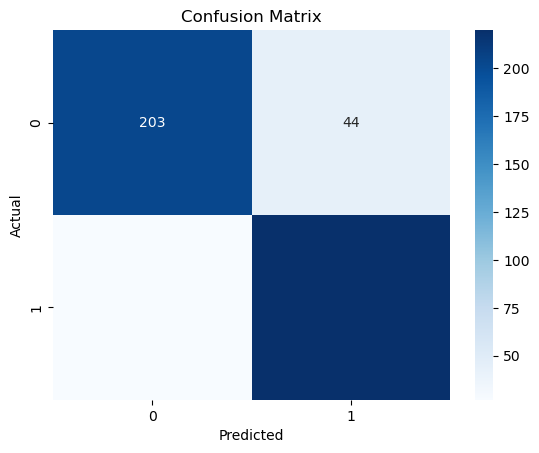

Classification Report
  
              precision    recall  f1-score   support

No Attrition       0.88      0.82      0.85       247
   Attrition       0.83      0.89      0.86       247

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494



In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../Outputs/Machine_Learning_Models/neural_networks_confusion_matrix.png')
plt.show()

# Classification 
print("Classification Report")
print("  ")
print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Attrition']))
